In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [5]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
df['target']=iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
df['flower names']=df.target.apply(lambda x:iris.target_names[x])             #lambda function helps to apply transformation
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

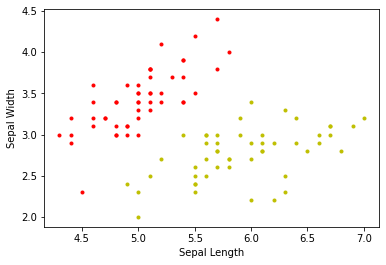

In [12]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],marker='.',color='r')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],marker='.',color='y')

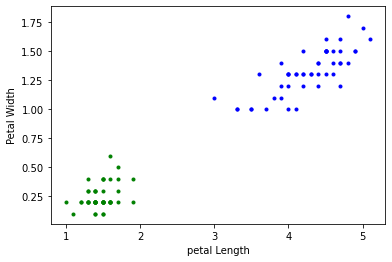

In [13]:
plt.xlabel('petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],marker='.',color='g')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='.',color='b')

In [14]:
x=df.drop(['target','flower names'],axis='columns')
y= df.target

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [16]:
from sklearn.svm import SVC
model = SVC()

In [17]:
model.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
model.predict(x_test)

array([1, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0])

In [19]:
y_test

56     1
99     1
114    2
94     1
30     0
122    2
36     0
123    2
12     0
44     0
144    2
112    2
107    2
134    2
140    2
10     0
6      0
38     0
82     1
124    2
41     0
22     0
78     1
57     1
86     1
85     1
47     0
81     1
61     1
28     0
Name: target, dtype: int64

In [20]:
model.score(x_test,y_test)

1.0

In [21]:
model.predict([[6.4,3.2,4.5,1.5]])

array([1])

In [23]:
model_C=SVC(gamma=10)
model_C.fit(x_train,y_train)
model.score(x_test,y_test)

1.0